In [26]:
# Declaramos librerías
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree

In [27]:
# Creamos un conjunto de datos de clasificación
personajes = [{'Nombre': 'Bellatrix',    'Casa': 0, 'Valentía': 7, 'Maldad': 10},
              {'Nombre': 'Colagusano',   'Casa': 1, 'Valentía': 2, 'Maldad': 7},
              {'Nombre': 'Draco Malfoy', 'Casa': 0, 'Valentía': 4, 'Maldad': 7},
              {'Nombre': 'Dumbledure',   'Casa': 1, 'Valentía': 9, 'Maldad': 9},
              {'Nombre': 'Ginny',        'Casa': 1, 'Valentía': 8, 'Maldad': 2},
              {'Nombre': 'Harry Potter', 'Casa': 1, 'Valentía': 8, 'Maldad': 6},
              {'Nombre': 'Hermione',     'Casa': 1, 'Valentía': 10, 'Maldad': 4},
              {'Nombre': 'Lupin',        'Casa': 1, 'Valentía': 7, 'Maldad': 3},
              {'Nombre': 'McGonagall',   'Casa': 1, 'Valentía': 9, 'Maldad': 2},
              {'Nombre': 'Neville',      'Casa': 1, 'Valentía': 5, 'Maldad': 1},
              {'Nombre': 'Ron',          'Casa': 1, 'Valentía': 6, 'Maldad': 2},
              {'Nombre': 'Sirius',       'Casa': 1, 'Valentía': 9, 'Maldad': 1},
              {'Nombre': 'Snape',        'Casa': 0, 'Valentía': 10, 'Maldad': 5},
              {'Nombre': 'Umbridge',     'Casa': 0, 'Valentía': 5, 'Maldad': 10},
              {'Nombre': 'Voldemort',    'Casa': 0, 'Valentía': 10, 'Maldad': 10},


              {'Nombre': 'Luna Lovegord',    'Casa': 3, 'Valentía': 7, 'Maldad': 1},
              {'Nombre': 'Glideroy Lockhart',   'Casa': 3, 'Valentía': 1, 'Maldad': 5},
              {'Nombre': 'Helena Ravenclew', 'Casa': 3, 'Valentía': 7, 'Maldad': 2},
              {'Nombre': 'Gerrick Ollivander',   'Casa': 3, 'Valentía': 3, 'Maldad': 1},
              {'Nombre': 'Cho Chang',        'Casa': 3, 'Valentía': 5, 'Maldad': 2},
              {'Nombre': 'Filwitch', 'Casa': 3, 'Valentía': 6, 'Maldad': 4},
             ]

X = []
y = []
for personaje in personajes:
    X.append([personaje['Valentía'], personaje['Maldad']])
    y.append(personaje['Casa'])

print(X)
print(y)

[[7, 10], [2, 7], [4, 7], [9, 9], [8, 2], [8, 6], [10, 4], [7, 3], [9, 2], [5, 1], [6, 2], [9, 1], [10, 5], [5, 10], [10, 10], [7, 1], [1, 5], [7, 2], [3, 1], [5, 2], [6, 4]]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 3, 3, 3, 3, 3]


In [28]:
# Creamos el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=10)
# max_leaf_nodes=3 (Cantidad máxima de hojas en cada nodo)
# max_depth_3 (Profundidad máxma del árbol)

# Entrenamos el modelo
clf.fit(X, y)

DecisionTreeClassifier(random_state=10)

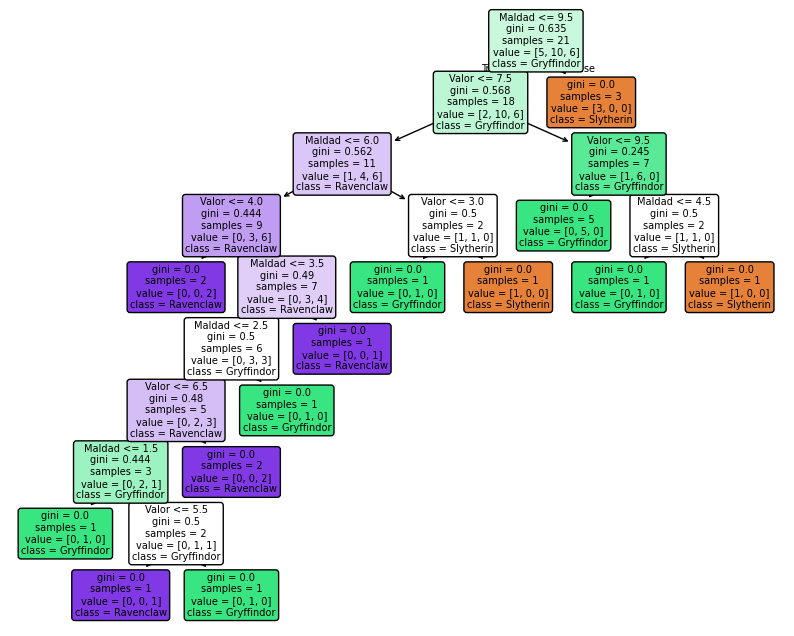

In [29]:
# Visualizamos el árbol de decisión
plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True, rounded=True, class_names=["Slytherin", "Gryffindor", "Ravenclaw"], feature_names=["Valor", "Maldad"])
plt.show()

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, personajes, resolution=0.01):
    # Definir los límites del gráfico
    x_min, x_max = 0, 11
    y_min, y_max = 0, 11

    # Crear una malla de puntos para representar las regiones de decisión
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predecir las etiquetas de cada punto en la malla
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Crear un mapa de colores personalizado
    custom_cmap = ListedColormap(['#008000', '#FFA500', '#0000FF'])  # Verde, Naranja, Azul
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=custom_cmap)

    # Configurar los límites del gráfico
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Asignar colores a cada casa y trazar los personajes en el gráfico
    colors = {0: 'green', 1: 'orange', 2: 'blue'}
    for personaje in personajes:
        color = colors.get(personaje['Casa'], 'gray')  # Color por casa
        plt.scatter(personaje['Valentía'], personaje['Maldad'], color=color, edgecolor='k')
        plt.text(personaje['Valentía'] + 0.1, personaje['Maldad'] + 0.1, personaje['Nombre'], fontsize=8)

    # Añadir la leyenda con los colores de cada casa
    legend_patches = [
        mpatches.Patch(color='green', label='Slytherin'),
        mpatches.Patch(color='orange', label='Gryffindor'),
        mpatches.Patch(color='blue', label='Ravenclaw')
    ]
    plt.legend(handles=legend_patches, loc='upper right')

    # Etiquetas de los ejes
    plt.xlabel('Valentía')
    plt.ylabel('Maldad')
    
    # Quitar el título
    # plt.title('Regiones de Decisión por Casa')

    # Mostrar el gráfico
    plt.show()


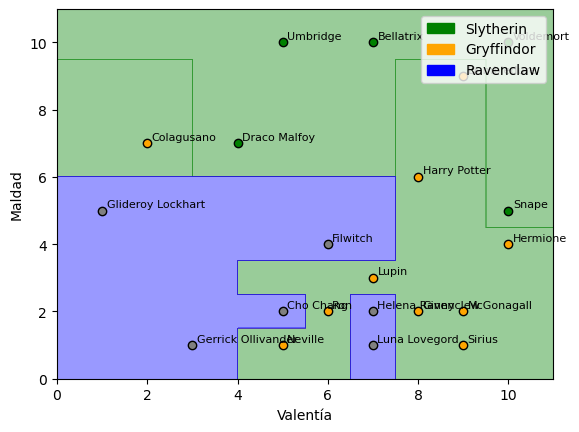

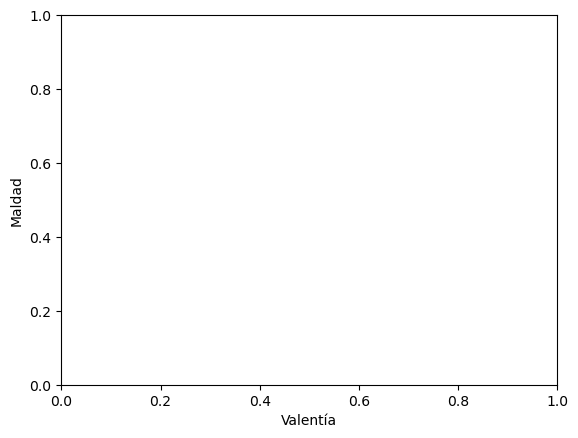

In [37]:
import matplotlib.pyplot as plt

# Llamado a la función con los datos correspondientes
plot_decision_regions(X, y, classifier=clf, personajes=personajes)

# Etiquetas de los ejes
plt.xlabel('Valentía')
plt.ylabel('Maldad')

# Mostrar el gráfico
plt.show()
